In [1]:
using PyPlot

INFO: Loading help data...


La traducción del código:

In [2]:
μ_a = 2;   #/* Absorption Coefficient in 1/cm !!non-zero!! */
μ_s = 20;   #/* Reduced Scattering Coefficient in 1/cm */
microns_per_shell = 50;  #/* Thickness of spherical shells in microns */
photons = 10000;
SHELL_MAX=102 #constante
heat=zeros(SHELL_MAX+1); #arreglo de tamaño 101
albedo = μ_s / (μ_s + μ_a); #porcentaje de radiación que la superficie refleja respecto de la radiación incidente.
shells_per_mfp = 1e4/microns_per_shell/(μ_s + μ_a);
t=0
t1=0
xi1=0
xi2=0;

In [3]:
#sqrt(log(0)) sale Domain error

La ley de Beer nos dice que $\frac{dI}{dx}=-(\mu_a+\mu_s)I$, entonces $I(x)=I_0 e^{-(\mu_a+\mu_s)x}$, por lo tanto $(\mu_a+\mu_s)x=-ln \frac{I}{I_0}$.

A $\mu_t=\mu_a+\mu_s$ se le llama el coeficiente de extinción.

Tomamos $ \frac{I}{I_0}=\epsilon$ y $t=(\mu_a+\mu_s)x$, donde $\epsilon$ es un número aletorio, entonces podemos muestrear la posición del fotón usando $t=-ln(\epsilon)$. 

Albedo es el porcentaje de los fotones que son dispersados por la superficie respecto al porcentaje de fotones que puede ser dispersado o absorbido, entonces, $1-albedo$ es el porcentaje de los fotones que no son dipersados por las superficie, es decir el porcentaje de fotones que se quedaron en la posición $r$.
   Finalmente expresamos $heat(r)$ como los fotones que se quedaron en la posición $r$, entonces $heat(r) = (1.0-albedo)*weight$ donde $weigth$ es el tamaño del paquete de fotones.

In [4]:
for i in 1:photons
    i+=1
  x = 0.0; y = 0.0; z = 0.0; #/*launch*/  
u = 0.0; v = 0.0; w = 1.0;
weight = 1.0;
    
    while true #infinito 
        t = -log((rand()+.0000000001)); #/*move*/ #ϵ es el número aleatorio Distribución de probabilidad ϵ=e^-t #ley de beer #para que nunca se indefina,sqrt(log(0)) arroja Domain error
    x += t * u; #se depeja t que es como una posición.
    y += t * v;
    z += t * w;  
    shell=sqrt(x*x+y*y+z*z)*shells_per_mfp; #/*absorb*/
        #println("$shell"), shell da un montón de número aleatorios, no sé cómo al final llenan todos la matriz heat.
 
        if shell > SHELL_MAX-1 #condiciones a la frontera periódicas
            shell = SHELL_MAX-1
        end
        heat[int(shell+1)] = (1.0-albedo)*weight #cada vez  disminuye la intensidad del paquete de fotones
      weight *= albedo
        
        
    while xi1*xi1+xi2*xi2<=1 #/*new direction*/ infinito
            xi1=2.0*rand()-1.0 #número aleatorio entre -1 y 1
            xi2=2.0*rand()-1.0  
               end
        
    u = 2.0 * t - 1.0;
        v = xi1 * sqrt((abs(1-u*u))/t); #le agregué abs para que las raíces no se hicieran negativas 
        w = xi2 * sqrt(abs(1-u*u)/t);

              if weight < 0.001    #/*roulette*/
            if rand()<.9 #Antes decía: if (rand() > 0.1 * RAND_MAX) break; es una probabilidad de 90%,  RAND_MAX es al menos  32767, rand() genera un número aleatorio entre 0 y RAND_MAX
                break 
            end
            weight /= 0.1; # se rompe cuando quedan el 10% de fotones
           end

        
        
        
        
    end
end
    
    
    
    

El código nos devuelve la intensidad

In [5]:
heat[end-1]=heat[end-2];# corregimos un numerito raro;

In [6]:
for i in 1:length(heat)  #tenemos algo lineal, lo hace caer como 1/t
  heat[i]=heat[i]/t/(i*i+i+1.0/3.0)
end

Aquí hace $heat(r)=\frac{heat(r) *(\  r^2 +r+\frac{1}{3})}{t}$, donde $t=-log(\epsilon)$, con $\epsilon$ número aleatorio.

In [7]:
heat;

In [8]:
radio=[.1:microns_per_shell:5150]; # empezamos desde .1 para que al graficar la solución a la ecuación de difusión en función del radio no tengamos un 1/0

r=radio*1e-4; #radio en cm;

Podemos ver que la gráfica es exponencial, pero no tiene las dimensiones de tiny.

Ahora graficamos la solución de la ecuación de difusión de acuerdo a la siguiente relación:
$$Heat(r)=\frac{3}{4 \pi r} \mu_a \mu_t p_0 e^{-\sqrt{3 \mu_a \mu_t} r}$$
$$\mu_t=\mu_a+\mu_s$$

In [9]:
#μa absortion coefficent
#μs reduced scattering coefficent
#μt coefficiente total de atenuación
function diffusion(μa,μs,r,p_0)
    μt=μa+μs
    kd=sqrt(3*μa*μt)
    n=length(r)
    heat=zeros(n)
    for i in 1:n 
        heat[i]=(μa*μt*3*p_0*exp(-r[i]*sqrt(3*μa*μt)))/(π*4*r[i])
    
end
    heat
end
    

diffusion (generic function with 1 method)

In [10]:
#se utilizó p_0=1e-5, el calor estaba en micras
x=diffusion(μ_a,μ_s,r,1e-5);


In [11]:
heat;

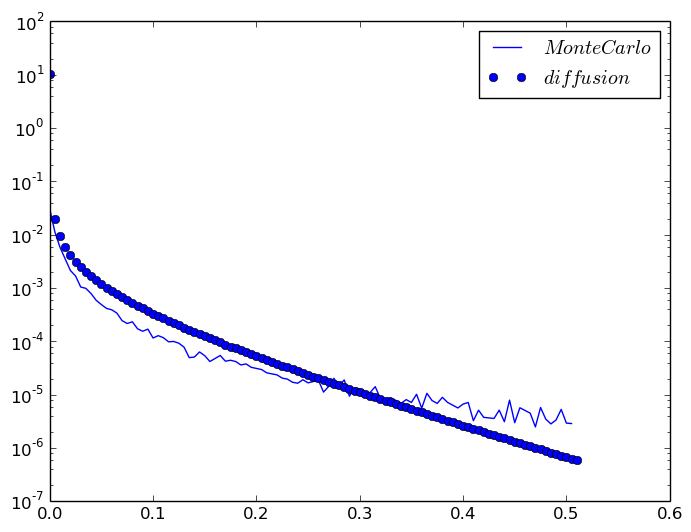

In [12]:
semilogy(r,heat,label=L"$Monte Carlo$")
semilogy(r,x,"bo",label=L"$diffusion$")

legend();
    

Las soluciones de Monte Carlo y la ecuación de difusión se aproxima un montón!

# El código original:


     double mu_a = 2;			   #Absorption Coefficient in 1/cm !!non-zero!! 
    double mu_s = 20;			   # Reduced Scattering Coefficient in 1/cm 
    double microns_per_shell = 50; # Thickness of spherical shells in microns 
    long   i, shell, photons = 10000;
    double x, y, z, u, v, w, weight;
    double albedo, shells_per_mfp, xi1, xi2, t, heat[SHELL_MAX];

int main () 
{
	albedo = mu_s / (mu_s + mu_a);
	shells_per_mfp = 1e4/microns_per_shell/(mu_a+mu_s);
	
	for (i = 1; i <= photons; i++)
	{
		x = 0.0; y = 0.0; z = 0.0;					/*launch*/  
		u = 0.0; v = 0.0; w = 1.0;		
		weight = 1.0;
		
		for (;;) { 
            t = -log((rand()+1.0)/(RAND_MAX+1.0));	/*move*/#ϵ es el número aleatorio Distribución de probabilidad ϵ=e^-t, se depeja t que es como una posición. 
			x += t * u;
			y += t * v;
			z += t * w;  

			shell=sqrt(x*x+y*y+z*z)*shells_per_mfp;	/*absorb*/
			if (shell > SHELL_MAX-1) shell = SHELL_MAX-1;	
			heat[shell] += (1.0-albedo)*weight;
			weight *= albedo;
		
			for(;;) {								/*new direction*/
				xi1=2.0*rand()/RAND_MAX - 1.0; 
				xi2=2.0*rand()/RAND_MAX - 1.0; 
				if ((t=xi1*xi1+xi2*xi2)<=1) break;
			}
			u = 2.0 * t - 1.0;
			v = xi1 * sqrt((1-u*u)/t);
			w = xi2 * sqrt((1-u*u)/t);
			
			if (weight < 0.001){ 					/*roulette*/
				if (rand() > 0.1 * RAND_MAX) break; 
				weight /= 0.1;
			}
		} 
	}	
	
	printf("%s\n%s\n\nScattering = %8.3f/cm\nAbsorption = %8.3f/cm\n",t1,t2,mu_s,mu_a);
	printf("Photons    = %8ld\n\n Radius         Heat\n[microns]     [W/cm^3]\n",photons);
	t = 4*3.14159*pow(microns_per_shell,3)*photons/1e12;
	for (i=0;i<SHELL_MAX-1;i++)
    printf("%6.0f    %12.5f\n",i*microns_per_shell, heat[i]/t/(i*i+i+1.0/3.0)); # la trayectoria es lineal porque t, el código nos devuleve 
	printf(" extra    %12.5f\n",heat[SHELL_MAX-1]/photons);
	return 0


http://omlc.org/software/mc/